In [1]:
from IPython.display import clear_output, display
import sympy
import numpy as np
import random
import ipywidgets as widgets
import math
from fractions import Fraction

z, i, r, e, t, p = sympy.symbols("z i r e theta pi")

button = widgets.Button(description="Generate problem")
output = widgets.Output()

def power_select(n):
    global z_power
    z_power = n

widgets.interact(power_select, n = [1, 2, 3, 4, 5, 6, 7, 8, 9])

display(button, output)

def on_button_clicked(b):
    with output:
        clear_output(wait=True)

        global real
        global imag
        real = random.randint(-9, 9)
        imag = random.randint(-9, 9)

        root = random.randint(1, 6) # Randomly make some coefficients into roots
        if root == 2:
            real = np.sign(real) * sympy.sqrt(abs(real))
        elif root == 5:
            imag = np.sign(imag) * sympy.sqrt(abs(imag))

        expr = sympy.Eq(z**z_power, real + imag*i)
        sympy.pretty_print(expr)

button.on_click(on_button_clicked)

interactive(children=(Dropdown(description='n', options=(1, 2, 3, 4, 5, 6, 7, 8, 9), value=1), Output()), _dom…

Button(description='Generate problem', style=ButtonStyle())

Output()

In [99]:
def get_polar_roots(power):
    magnitude = sympy.sqrt(real**2 + imag**2)
    argument = sympy.atan2(imag, real)
    complex_roots = []

    for k in range(0, power):
        complex_roots.append( r ** (Fraction(1, power)) * (e ** ((t + 2*k*p) * i/power)))

    return complex_roots, magnitude, argument

polar_roots = get_polar_roots(z_power)
roots, mag, arg = polar_roots[0], polar_roots[1], polar_roots[2]

sympy.init_printing(use_latex='mathjax')
sympy.Eq(r, mag), sympy.Eq(t, arg), roots

⎛                        ⎡ i⋅θ         i⋅(2⋅π + θ)         i⋅(4⋅π + θ)        
⎜                        ⎢ ───         ───────────         ───────────        
⎜                        ⎢  6  6 ___        6      6 ___        6      6 ___  
⎝r = √10, θ = atan(1/3), ⎣e   ⋅╲╱ r , e           ⋅╲╱ r , e           ⋅╲╱ r , 

 i⋅(6⋅π + θ)         i⋅(8⋅π + θ)         i⋅(10⋅π + θ)      ⎤⎞
 ───────────         ───────────         ────────────      ⎥⎟
      6      6 ___        6      6 ___        6       6 ___⎥⎟
e           ⋅╲╱ r , e           ⋅╲╱ r , e            ⋅╲╱ r ⎦⎠

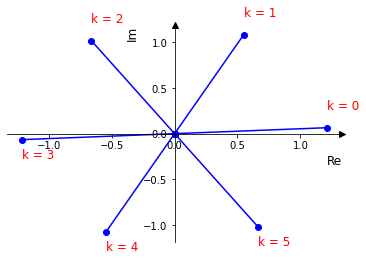

In [100]:
import matplotlib.pyplot as plt
import cmath

def complex_cartesian_roots(power):
    magnitude = math.sqrt(real**2 + imag**2)
    argument = math.atan2(imag, real)
    
    root_mag = magnitude**(1/power)
    root_args = [(argument + 2*math.pi*k) / power for k in range(0, power)]

    return [root_mag*(math.cos(root) + math.sin(root)*1j) for root in root_args]

def root_plotter(list_of_roots):
    ax = plt.gca() # Create axis
    ax.spines['left'].set_position('zero') # Centre axis
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    plt.ylabel('Im', loc='top', fontsize=12) # Label axis
    plt.xlabel('Re', loc='right', fontsize=12)
    ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False) # Add arrows to axis
    ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)


    for root in list_of_roots:
        ax.plot([0,root.real], [0,root.imag], 'bo-')

    for k in range(0, len(list_of_roots)):
        x, y = list_of_roots[k].real, list_of_roots[k].imag
        text = "k = " + str(k)
        ax.annotate(text, xy = (x, y), xytext=(x, y+0.2*np.sign(y)), fontsize=12, color="red")

root_plotter(complex_cartesian_roots(z_power))

